In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn .metrics import accuracy_score


In [2]:
db_data=pd.read_csv("C:\\Users\\Indrajit\\Downloads\\diabetes (1).csv")
db_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
db_data.isnull().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
db_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
db_data.shape

(768, 9)

In [6]:
db_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
db_data['Glucose']=db_data['Glucose'].replace(0,db_data['Glucose'].mean())
db_data['BloodPressure']=db_data['BloodPressure'].replace(0,db_data['BloodPressure'].mean())
db_data['SkinThickness']=db_data['SkinThickness'].replace(0,db_data['SkinThickness'].median())
db_data['Insulin']=db_data['Insulin'].replace(0,db_data['Insulin'].median())
db_data['BMI']=db_data['BMI'].replace(0,db_data['BMI'].median())


###Some of the deta cannot be 0 value like Glucose,BloodPressure,SkinThickness,Insulin,BMI



In [8]:
db_data['Glucose']

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [9]:
db_data['Outcome'].value_counts()#how many time 0 and 1 ocuured in outcome column

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
dr=db_data.groupby('Outcome').mean().T
dr

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,110.705367,142.159661
BloodPressure,70.810008,74.950326
SkinThickness,26.058000,29.716418
Insulin,83.188000,116.041045
BMI,30.880200,35.381343
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


In [11]:
data=db_data.drop(columns='Outcome',axis=1)

In [12]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


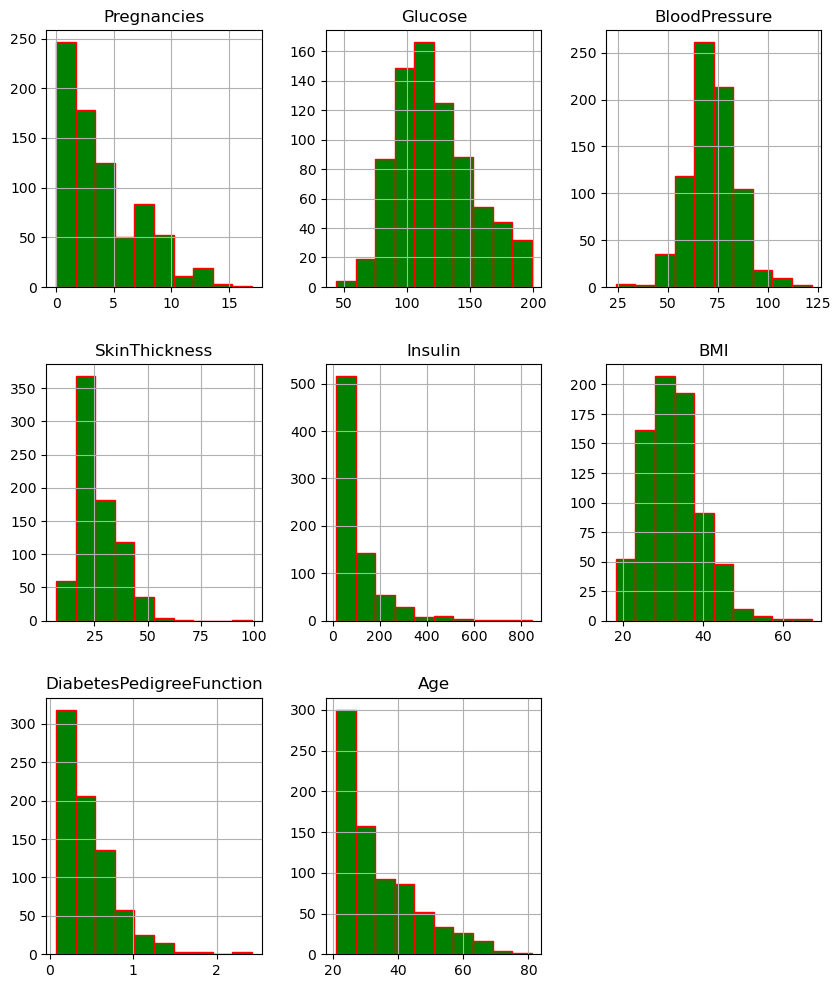

In [14]:
data.hist(bins=10,figsize=(10,12),color='g',edgecolor='r')
plt.show()

In [15]:
cor_matrix=data.corr()
cor_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000


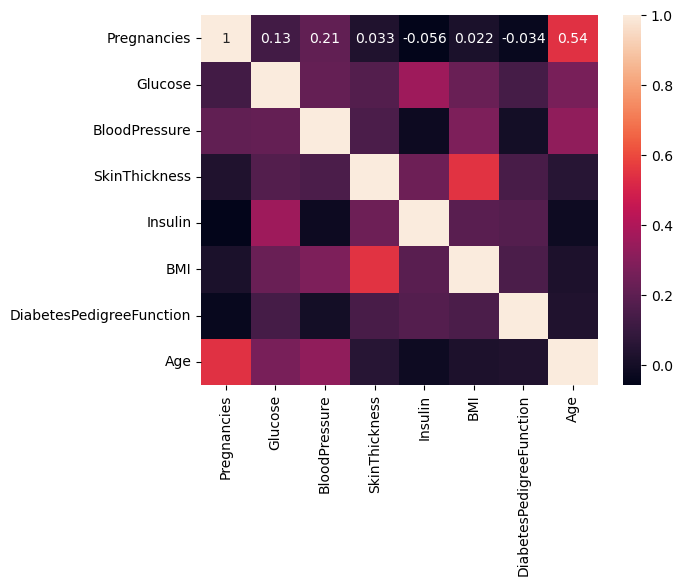

In [16]:
sns.heatmap(data.corr(), annot = True)
plt.show()

In [17]:
x=db_data.drop(columns='Outcome',axis=1)
x
y=db_data.iloc[:,8]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [18]:
x


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [19]:

y


0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [20]:
sc=StandardScaler()
scaled_x=sc.fit_transform(x)
print(scaled_x)

[[ 0.63994726  0.86527574 -0.0210444  ...  0.16724016  0.46849198
   1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286 ... -0.85155088 -0.36506078
  -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 ... -1.33183808  0.60439732
  -0.10558415]
 ...
 [ 0.3429808  -0.02240928 -0.0210444  ... -0.90976751 -0.68519336
  -0.27575966]
 [-0.84488505  0.14197684 -1.01212132 ... -0.34215536 -0.37110101
   1.17073215]
 [-0.84488505 -0.94297153 -0.18622389 ... -0.29849289 -0.47378505
  -0.87137393]]


In [21]:
x_train,x_test,y_train,y_test=train_test_split(scaled_x,y,test_size=.2,random_state=42)

In [22]:
print(x.shape,x_train.shape,x_test.shape)

(768, 8) (614, 8) (154, 8)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn .tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier             #######Applying algorithms
from sklearn.ensemble import RandomForestClassifier


In [24]:
lgc=LogisticRegression()
dtr=DecisionTreeClassifier()
knr=KNeighborsClassifier ()  
rtr= RandomForestClassifier()
svm_model=SVC()

In [25]:
lgc.fit(x_train,y_train)
dtr.fit(x_train,y_train)
knr.fit(x_train,y_train)
svm_model.fit(x_train,y_train)
rtr.fit(x_train,y_train)


RandomForestClassifier()

In [26]:
y_pred=lgc.predict(x_test)  ######Logistic regression prediction
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [27]:
from sklearn.metrics import accuracy_score

am1=accuracy_score(y_test,y_pred)

In [28]:
print(f"training accuracy Logistic regression ={round(lgc.score(x_train,y_train)*100,2)}%")
print(f"testing accuracy Logistic regression={round(lgc.score(x_test,y_test)*100,2)}%")

training accuracy Logistic regression =77.36%
testing accuracy Logistic regression=76.62%


In [29]:
print("accuracy of the model:",am1)      #Logistic regression

accuracy of the model: 0.7662337662337663


In [30]:
y_pred=dtr.predict(x_test)##Decission tree model
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0],
      dtype=int64)

In [31]:
am2=accuracy_score(y_test,y_pred)
am2


0.7207792207792207

In [32]:
print("accuracy score of the model:",am2)#Decission tree model

accuracy score of the model: 0.7207792207792207


In [33]:
print(f"Training accuracy of decission tree classifier{round(dtr.score(x_train,y_train)*100,2)}%")
print(f"testing accuracy of decission tree classifieSr{round(dtr.score(x_test,y_test)*100,2)}%")

Training accuracy of decission tree classifier100.0%
testing accuracy of decission tree classifieSr72.08%


In [34]:
y_pred=svm_model.predict(x_test)  #support vector classifier
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

am3=accuracy_score(y_test,y_pred)

In [35]:
am3=accuracy_score(y_test,y_pred)
am3

0.7597402597402597

In [36]:
print("accuracy score of the model:", am3)

accuracy score of the model: 0.7597402597402597


In [37]:
print(f"training accuracy of support vectot classifier {round(svm_model.score(x_train,y_train)*100,2)}%")
print(f"testing accuracy of supportr vector classifiers{round(svm_model.score(x_test,y_test)*100,2)}%")

training accuracy of support vectot classifier 82.57%
testing accuracy of supportr vector classifiers75.97%


In [38]:
y_pred=knr.predict(x_test)# kneighbours
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [39]:
am4=accuracy_score(y_test,y_pred)
am4
print("Accuracy score of the mopdel:",am4)

Accuracy score of the mopdel: 0.7532467532467533


In [40]:
print(f"training accuracy of kneighbour model {round(knr.score(x_train,y_train)*100,2)}%")
print(f"testing accuracy of kneighbour model {round(knr.score(x_test,y_test)*100,2)} %")

training accuracy of kneighbour model 83.39%
testing accuracy of kneighbour model 75.32 %


In [41]:
y_pred=rtr.predict(x_test)#Randomforestclassifier
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [42]:
am5=accuracy_score(y_test,y_pred)
print("accuracy score of the model",am5)

accuracy score of the model 0.7662337662337663


In [43]:
print(f"training accuracy of random forest classifier model {round(rtr.score(x_train,y_train)*100,2)}%")
print(f"testing accuracy of random classifier model {round(rtr.score(x_test,y_test)*100,2)}%")

training accuracy of random forest classifier model 100.0%
testing accuracy of random classifier model 76.62%


In [44]:
#predicting model
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [45]:
preg=int(input("enter the Pregnancies="))
gcs=float(input("enter the Glucose="))
bp=float(input("enter the BloodPressure="))
st=float(input("enter the SkinThickness="))
ins=float(input("enter the Insulin="))
bmi=float(input("enter the BMI="))
dbs=float(input("enter the 'DiabetesPedigreeFunction' ="))
age=float(input("enter the Age="))
patients_data=[preg,gcs,bp,st,ins,bmi,dbs,age]
patients_data


enter the Pregnancies= 5
enter the Glucose= 166
enter the BloodPressure= 72
enter the SkinThickness= 19
enter the Insulin= 175
enter the BMI= 25.8
enter the 'DiabetesPedigreeFunction' = 0.587
enter the Age= 51


[5, 166.0, 72.0, 19.0, 175.0, 25.8, 0.587, 51.0]

In [46]:
array=np.asarray(patients_data)
array

array([  5.   , 166.   ,  72.   ,  19.   , 175.   ,  25.8  ,   0.587,
        51.   ])

In [47]:
input_data_reshaped=array.reshape(1,-1)
input_data_reshaped

array([[  5.   , 166.   ,  72.   ,  19.   , 175.   ,  25.8  ,   0.587,
         51.   ]])

In [48]:
std_data=sc.transform(input_data_reshaped)
std_data

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.3429808 ,  1.45706576, -0.0210444 , -0.90367905,  0.76174179,
        -0.96798414,  0.34768723,  1.51108316]])

In [49]:
prediction=svm_model.predict(std_data)
prediction

array([1], dtype=int64)

In [50]:
prediction[0]

1

In [51]:
if(prediction[0]==0) :
          print("the person is not diabetic")
else:
   print("the person is diabetic")


the person is diabetic


In [ ]:
import warnings
warnings.filterwarnings('ignore')
preg=int(input("enter the Pregnancies="))
gcs=float(input("enter the Glucose="))
bp=float(input("enter the BloodPressure="))
st=float(input("enter the SkinThickness="))
ins=float(input("enter the Insulin="))
bmi=float(input("enter the BMI="))
dbs=float(input("enter the 'DiabetesPedigreeFunction' ="))
age=float(input("enter the Age="))
patients_data=[preg,gcs,bp,st,ins,bmi,dbs,age]
array=np.asarray(patients_data)
input_data_reshaped=array.reshape(1,-1)
std_data=sc.transform(input_data_reshaped)
prediction=svm_model.predict(std_data)
print("                   ")
print("****** Machine learning model prediction************* ")
if(prediction[0]==0) :
          print("the person is not diabetic")
else:
    print("the person is diabetic")


